### 1. Forma Vectorial vs. Uso de Sumatorias en RLM y RLS

En la regresión, tanto la forma vectorial como el uso de sumatorias son métodos para calcular los coeficientes del modelo. La forma vectorial es más concisa y eficiente para computación, especialmente con grandes volúmenes de datos.

**Forma Vectorial:**
En la forma vectorial, las ecuaciones de la regresión se expresan utilizando matrices y vectores. Por ejemplo, en un modelo de regresión lineal múltiple con \(n\) observaciones y \(p\) predictores, el modelo puede expresarse como:
$$
\mathbf{y} = \mathbf{X} \beta + \epsilon
$$
donde:
- $\mathbf{y}$ es el vector de respuesta de $n \times 1$.
- $\mathbf{X}$ es la matriz de diseño de $n \times (p + 1)$ (incluyendo una columna de unos para el intercepto).
- $\beta$ es el vector de coeficientes de $(p + 1) \times 1$.
- $\epsilon$ es el vector de errores.

Los coeficientes se estiman usando la ecuación normal:
$$
\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

**Uso de Sumatorias:**
El enfoque tradicional utiliza sumatorias para calcular cada componente de los coeficientes. Por ejemplo, en una regresión lineal simple:
$$
b_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$
$$
b_0 = \bar{y} - b_1\bar{x}
$$
Este método es más intuitivo pero menos eficiente computacionalmente para grandes datos.

### 2. Cálculo de Métricas de Error (MSE, RMSE)

**MSE (Error Cuadrático Medio):**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
En forma vectorial, se puede calcular como:
$$
\text{MSE} = \frac{1}{n} (\mathbf{y} - \mathbf{X}\hat{\beta})^T (\mathbf{y} - \mathbf{X}\hat{\beta})
$$

**RMSE (Raíz del Error Cuadrático Medio):**
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

### 3. Coeficiente de Determinación (R²)
$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$
En forma vectorial, se expresa como:
$$
R^2 = 1 - \frac{(\mathbf{y} - \mathbf{X}\hat{\beta})^T(\mathbf{y} - \mathbf{X}\hat{\beta})}{(\mathbf{y} - \bar{\mathbf{y}})^T(\mathbf{y} - \bar{\mathbf{y}})}
$$

### 4. Prueba de Hipótesis para Coeficientes
Para probar si un coeficiente es significativamente diferente de cero, se utiliza la estadística t:
$$
t = \frac{\hat{\beta}_j - 0}{\text{SE}(\hat{\beta}_j)}
$$
donde $\text{SE}(\hat{\beta}_j)$ es el error estándar del coeficiente $\hat{\beta}_j$.

La prueba de hipótesis en la regresión busca determinar la significancia de cada predictor, esencial para entender la contribución de cada variable al modelo.

La ventaja principal de la forma vectorial sobre el uso de sumatorias es su eficiencia y claridad, especialmente cuando se trabaja con modelos complejos y grandes conjuntos de datos.


In [5]:
import numpy as np

# Datos de ejemplo
# X: Matriz de diseño con la primera columna de unos para el intercepto
X = np.array([
    [1, 5, 2],
    [1, 2, 3],
    [1, 3, 4],
    [1, 4, 5]
])

# y: Vector de respuesta
y = np.array([6, 8, 10, 12])

# Cálculo de los coeficientes de regresión (β)
X_transpose = X.T
X_transpose_X = np.dot(X_transpose, X)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)
X_transpose_y = np.dot(X_transpose, y)
beta = np.dot(X_transpose_X_inv, X_transpose_y)

# Simplificando el cálculo de los coeficientes de regresión (β)

beta = np.linalg.solve(X.T @ X, X.T @ y)

# Cálculo del MSE
y_pred = np.dot(X, beta)
residuals = y - y_pred
mse = np.mean(residuals**2)

# Cálculo del RMSE
rmse = np.sqrt(mse)

# Cálculo del coeficiente de determinación (R²)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print("Coeficientes de Regresión:", beta)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r_squared)


Coeficientes de Regresión: [ 2.0000000e+00 -4.4408921e-16  2.0000000e+00]
MSE: 0.0
RMSE: 0.0
R²: 1.0


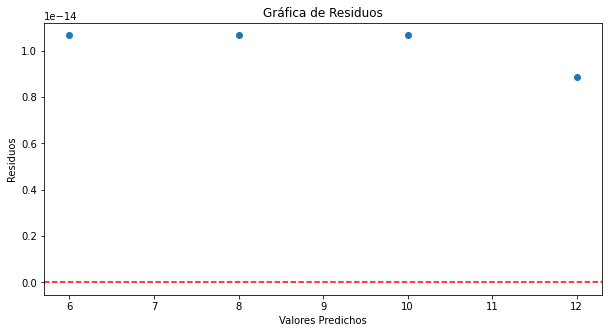

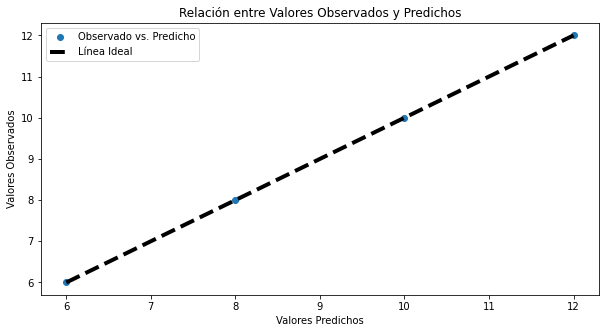

In [3]:
import matplotlib.pyplot as plt

# Gráfica de Residuos
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfica de Residuos')
plt.show()

# Gráfica de los valores observados vs. los predichos
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, y, label='Observado vs. Predicho')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Línea Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Observados')
plt.title('Relación entre Valores Observados y Predichos')
plt.legend()
plt.show()
